# Predator Analysis: HNSC

## Evaluation on _CGC_



<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">Predator\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorAnalysis_HNSC_CGC.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">June 17th, 2022</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>

TBA

In [1]:
from IPython.display import display
from PredatorAnalysis import PredatorAnalysis

# Paths
## SNVs
SNV_COMMON_PATH = "../data/snv_datasets/"
SNV_HNSC_PATH = SNV_COMMON_PATH + "SNV_HNSC_hg38_2021-09-22.csv"

PREDICTION_ID = "76f498d9/"
PREDICTIONS_COMMON_PATH = "../data/predictions_datasets/hnsc_prediction_2022-06-17/" + PREDICTION_ID
PREDICTION_HNSC_REDUCED_PATH = PREDICTIONS_COMMON_PATH + "predictions_soft_2022-06-17.csv"

ELASPIC_RESULTS_COMMON_PATH = "../data/Elaspic_merged_results/"  # elaspic_results_datasets
HNSC_CORE_PATH = ELASPIC_RESULTS_COMMON_PATH + "HNSC_Core_2021-11-17.txt"
HNSC_INTERFACE_PATH = ELASPIC_RESULTS_COMMON_PATH + "HNSC_Interface_2021-11-17.txt"

# Patient Interaction data
HNSC_PATIENT_INTERACTION_DATA_PATH = "../data/patient_interaction_datasets/HNSC_patient_interactions_analysis_table_2022-06-17.xlsx"

# CGC GENES
CGC_ALL_PATH = "../data/cgc_genes/all_cgc_synonyms_genes_2021-11-06.txt"
CGC_HEAD_AND_NECK_PATH = "../data/cgc_genes/head_and_neck_synonyms_genes_2021-11-06.txt"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

In [2]:
predator_analysis = PredatorAnalysis(
    tcga="hnsc",
    snv_path=SNV_HNSC_PATH,
    prediction_data_path=PREDICTION_HNSC_REDUCED_PATH,
    prediction_id=PREDICTION_ID,
    elaspic_core_path=HNSC_CORE_PATH,
    elaspic_interface_path=HNSC_INTERFACE_PATH,
    patient_interaction_data_path=HNSC_PATIENT_INTERACTION_DATA_PATH,
    reference_data_name="cgc",
    reference_data_spec_cohort_path=CGC_HEAD_AND_NECK_PATH,
    reference_data_path=CGC_ALL_PATH
)

2022-06-17 14:53:11 | INFO     | PredatorAnalysis |  - - Predator Analysis - - 
2022-06-17 14:53:11 | INFO     | PredatorAnalysis | TCGA: hnsc
2022-06-17 14:53:11 | INFO     | PredatorAnalysis | PREDICTION ID: 76f498d9/
2022-06-17 14:53:11 | INFO     | helpers.helpers_analysis.loaders | Loading hnsc SNV datasets ..
2022-06-17 14:53:17 | DEBUG    | helpers.helpers_analysis.loaders | hnsc SNV data size: (102309, 121)
2022-06-17 14:53:18 | DEBUG    | helpers.helpers_analysis.loaders | hnsc SNV data processed size: (54883, 121)
2022-06-17 14:53:18 | INFO     | helpers.helpers_analysis.loaders | hnsc SNV datasets are loaded.
2022-06-17 14:53:18 | INFO     | helpers.helpers_analysis.loaders | Loading hnsc Prediction dataset ..
2022-06-17 14:53:18 | DEBUG    | helpers.helpers_analysis.loaders | hnsc Prediction data shape: (3990, 5)
2022-06-17 14:53:18 | INFO     | helpers.helpers_analysis.loaders | hnsc Prediction dataset is loaded.
2022-06-17 14:53:18 | INFO     | helpers.helpers_analysis.lo

# Datasets

##  1. SNV Datasets

In [3]:
# Original SNV Dataset
print(predator_analysis.data_materials["hnsc_snv_data"].shape)

(102309, 121)


In [4]:
# Processed SNV Dataset
print(predator_analysis.data_materials["hnsc_snv_data_processed"].shape)

(54883, 121)


In [5]:
# Simplified SNV Dataset
print(predator_analysis.data_materials["hnsc_snv_data_simplified"].shape)
predator_analysis.data_materials["hnsc_snv_data_simplified"].head(3)

(54883, 4)


Hugo_Symbol SWISSPROT HGVSp_Short Tumor_Sample_Barcode
0       PTCH2    Q9Y6C5      V1105M         TCGA-T2-A6X0
1       PDE4B    Q07343       R177Q         TCGA-T2-A6X0
2      FCGR3A    P08637        R88G         TCGA-T2-A6X0

## 2. ELASPIC Results Datasets

### 2.1. `Core` Datasets

In [6]:
# Core data 
print(predator_analysis.data_materials["hnsc_elaspic_core_data"].shape)
predator_analysis.data_materials["hnsc_elaspic_core_data"].head(3)

(17592, 103)


Input_identifier UniProt_ID Mutation Status  Type COSMIC_mut_ID  \
0           Q9UL19     Q9UL19     E98K   done  core    COSM125763   
1           Q9UQQ1     Q9UQQ1    V622L   done  core    COSM124656   
2           Q86YQ8     Q86YQ8    I135L   done  core    COSM122335   

  ClinVar_mut_ID UniProt_mut_ID Domain_name Domain_clan  ...  \
0              -              -        LRAT        LRAT  ...   
1              -              -   TFR_dimer   TFR_dimer  ...   
2              -              -          C2          C2  ...   

  number_of_residues_mut IntraclashesEnergy1_wt  IntraclashesEnergy1_mut  \
0                  125.0                      -                        -   
1                  151.0                      -                        -   
2                  146.0                      -                        -   

   IntraclashesEnergy2_wt IntraclashesEnergy2_mut Interface_hydrophobic_area  \
0                       -                       -                          -   
1                       -                       -                          -   
2                       -                       -                          -   

  Interface_hydrophilic_area Interface_total_area  \
0                          -                    -   
1                          -                    -   
2                          -                    -   

  Interface_contact_distance_wt Interface_contact_distance_mut  
0                             -                              -  
1                             -                              -  
2                             -                              -  

[3 rows x 103 columns]

In [7]:
# Core data simplified
print(predator_analysis.data_materials["hnsc_elaspic_core_data_simplified"].shape)
predator_analysis.data_materials["hnsc_elaspic_core_data_simplified"].head(3)

(17590, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     Q9UL19     E98K                     -
1     Q9UQQ1    V622L                     -
2     Q86YQ8    I135L                     -

### 2.2 `Interface` Datasets

In [8]:
print(predator_analysis.data_materials["hnsc_elaspic_interface_data"].shape)
predator_analysis.data_materials["hnsc_elaspic_interface_data"].head(3)

(7782, 103)


Input_identifier UniProt_ID Mutation Status       Type COSMIC_mut_ID  \
0           Q13485     Q13485    R361H   done  interface     COSM14122   
1           Q13485     Q13485    R361H   done  interface     COSM14122   
2           Q13485     Q13485    R361H   done  interface     COSM14122   

  ClinVar_mut_ID UniProt_mut_ID Domain_name Domain_clan  ...  \
0              -     VAR_036477         MH2         MH2  ...   
1              -     VAR_036477         MH2         MH2  ...   
2              -     VAR_036477         MH2         MH2  ...   

  number_of_residues_mut IntraclashesEnergy1_wt  IntraclashesEnergy1_mut  \
0                  428.0                55.6903                  55.9901   
1                  438.0                67.6915                  65.6937   
2                  434.0                70.5775                  70.5036   

   IntraclashesEnergy2_wt IntraclashesEnergy2_mut Interface_hydrophobic_area  \
0                 65.8172                 65.8172                    479.215   
1                 76.8231                 76.1833                    468.685   
2                 54.3675                 54.3675                    520.815   

  Interface_hydrophilic_area Interface_total_area  \
0                     224.96              704.175   
1                     330.13               798.81   
2                    309.375              830.195   

  Interface_contact_distance_wt  Interface_contact_distance_mut  
0                       5.89685                         6.78918  
1                       2.71793                         6.60775  
2                       3.35892                         5.43052  

[3 rows x 103 columns]

In [9]:
print(predator_analysis.data_materials["hnsc_elaspic_interface_processed_data"].shape)
predator_analysis.data_materials["hnsc_elaspic_interface_processed_data"].head(3)

(4137, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     Q13485    R361H                B7Z5N5
1     Q13485    R361H                Q68DB7
2     Q13485    R361H                Q53XR6

### 2.3. ELASPIC `Core` and `Interface` Combined

Combine two dataframes:
+ *hnsc_elaspic_core_data_simplified*
+ *hnsc_interface_processed*

In [10]:
print('ELASPIC CORE DATA')
display(predator_analysis.data_materials["hnsc_elaspic_core_data_simplified"].head(3))
print('Data dimensions:', predator_analysis.data_materials["hnsc_elaspic_core_data_simplified"].shape)

print('\nELASPIC INTERFACE DATA')
display(predator_analysis.data_materials["hnsc_elaspic_interface_processed_data"].head(3))
print('Data dimensions:', predator_analysis.data_materials["hnsc_elaspic_interface_processed_data"].shape)

ELASPIC CORE DATA


UniProt_ID Mutation Interactor_UniProt_ID
0     Q9UL19     E98K                     -
1     Q9UQQ1    V622L                     -
2     Q86YQ8    I135L                     -

Data dimensions: (17590, 3)

ELASPIC INTERFACE DATA


UniProt_ID Mutation Interactor_UniProt_ID
0     Q13485    R361H                B7Z5N5
1     Q13485    R361H                Q68DB7
2     Q13485    R361H                Q53XR6

Data dimensions: (4137, 3)


In [11]:
# ELASPIC Core and Interface Combined
print(predator_analysis.data_materials["hnsc_elaspic_core_and_interface_data"].shape)
predator_analysis.data_materials["hnsc_elaspic_core_and_interface_data"].head(3)

(21727, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     Q9UL19     E98K                     -
1     Q9UQQ1    V622L                     -
2     Q86YQ8    I135L                     -

## 3. Prediction Datasets

**Note**: We decided to drop some entries due to invalid prediction case, thus interface data and prediction data are not the same.

In [12]:
print(predator_analysis.data_materials["hnsc_prediction_data"].shape)
predator_analysis.data_materials["hnsc_prediction_data"].head(3)

(3990, 5)


UniProt_ID Mutation Interactor_UniProt_ID  Prediction  Median_Probability
0     Q13485    R361H                B7Z5N5           1             0.55795
1     Q13485    R361H                Q68DB7           1             0.51532
2     Q13485    R361H                Q53XR6           1             0.65254

## 4. CGC Genes

In [13]:
print(len(predator_analysis.data_materials['cgc_hnsc_genes']))
predator_analysis.data_materials['cgc_hnsc_genes'][:5]  # includes synonyms

50


['2195', '2065', 'LCCS2', 'Q13882', '79633']

In [14]:
print(len(predator_analysis.data_materials['cgc_all_genes']))
predator_analysis.data_materials['cgc_all_genes'][:5]  # includes synonyms

4878


['8522', 'KMT3G', 'P27635', 'ENSG00000122779.17', 'Q93074']

# Prepare Analysis

In [15]:
predator_analysis.prepare_analysis()

2022-06-17 14:54:09 | DEBUG    | PredatorAnalysis | hnsc_elaspic_proteins loaded.
2022-06-17 14:54:09 | DEBUG    | PredatorAnalysis | Number of proteins in ELASPIC hnsc: 7661


Retrieving Gene IDs from UniProt API .. :   0%|          | 0/7661 [00:00<?, ?it/s]

2022-06-17 14:54:11 | DEBUG    | PredatorAnalysis | hnsc_protein_to_gene_dict loaded.


  0%|          | 0/7661 [00:00<?, ?it/s]

0 	 A0AV96 	 0
1 	 A0AVT1 	 7
2 	 A0FGR9 	 1
3 	 A0PJK1 	 0
4 	 A0PJY2 	 0
2022-06-17 14:54:24 | DEBUG    | PredatorAnalysis | hnsc_protein_to_num_elaspic_interface_entries loaded.


  0%|          | 0/7661 [00:00<?, ?it/s]

0 	 A0AV96 	 0
1 	 A0AVT1 	 6
2 	 A0FGR9 	 1
3 	 A0PJK1 	 0
4 	 A0PJY2 	 0
2022-06-17 14:54:37 | DEBUG    | PredatorAnalysis | hnsc_protein_to_num_unique_interactors loaded.
2022-06-17 14:54:37 | DEBUG    | PredatorAnalysis | Number of patients in hnsc: 507.


## 1. Proteins

$\textit{Proteins} = \textit{ELASPIC Results Core Proteins} + \textit{ELASPIC Results Interface Proteins}$

In [16]:
print('Number of proteins in ELASPIC HNSC:', len(predator_analysis.data_materials["hnsc_elaspic_proteins"]))

Number of proteins in ELASPIC HNSC: 7661


## 2. Genes

In [17]:
# First 5 elements in protein to gene dictionary
list(predator_analysis.data_materials["hnsc_protein_to_gene_dict"].items())[:5]

[('A0AV96', 'RBM47'),
 ('A0AVT1', 'UBA6'),
 ('A0FGR9', 'ESYT3'),
 ('A0PJK1', 'SLC5A10'),
 ('A0PJY2', 'FEZF1')]

## 3. ELASPIC Number of Interface Entries

In [18]:
list(predator_analysis.data_materials["hnsc_protein_to_num_elaspic_interface_entries"].items())[:5]

[('A0AV96', 0), ('A0AVT1', 7), ('A0FGR9', 1), ('A0PJK1', 0), ('A0PJY2', 0)]

In [19]:
# TP53
predator_analysis.data_materials["hnsc_protein_to_num_elaspic_interface_entries"]["P04637"]  # 178

178

## 4. ELASPIC Number of Unique Interactors

In [20]:
list(predator_analysis.data_materials["hnsc_protein_to_num_unique_interactors"].items())[:5]

[('A0AV96', 0), ('A0AVT1', 6), ('A0FGR9', 1), ('A0PJK1', 0), ('A0PJY2', 0)]

In [21]:
# TP53
predator_analysis.data_materials["hnsc_protein_to_num_unique_interactors"]["P04637"]  # 16

16

## 5. Patients

In [22]:
print(f'Number of patients {len(predator_analysis.data_materials["hnsc_patients"])}.')  # 507.

Number of patients 507.


# Analysis Table Construction

In [23]:
predator_analysis.construct_analysis_table()

2022-06-17 14:54:55 | DEBUG    | PredatorAnalysis | Adding `PROTEIN` column ..
2022-06-17 14:54:55 | DEBUG    | PredatorAnalysis | Adding `GENE` column ..
2022-06-17 14:54:55 | DEBUG    | PredatorAnalysis | Adding `NUM_ELASPIC_INTERFACE_ENTRIES` column ..
2022-06-17 14:54:55 | DEBUG    | PredatorAnalysis | Adding `NUM_DISRUPTIVE_ENTRIES` column ..
2022-06-17 14:55:12 | DEBUG    | PredatorAnalysis | Adding `NUM_INCR_NOEFF_ENTRIES` column ..
2022-06-17 14:55:28 | DEBUG    | PredatorAnalysis | Adding `NUM_UNIQUE_INTERACTORS` column ..
2022-06-17 14:55:28 | DEBUG    | PredatorAnalysis | Adding `PATIENT_CORE_COUNT` column ..


  0%|          | 0/507 [00:00<?, ?it/s]

2022-06-17 15:08:43 | DEBUG    | PredatorAnalysis | Adding `PATIENT_INTERFACE_COUNT` column ..


  0%|          | 0/507 [00:00<?, ?it/s]

2022-06-17 15:17:19 | DEBUG    | PredatorAnalysis | Adding `NUM_INTERFACE_PATIENTS_DISRUPTIVE_INTERACTOR` column ..
2022-06-17 15:17:42 | DEBUG    | PredatorAnalysis | Adding `BASELINE` and `OUR_METHOD` columns ..
Adding +0 when `core_flag=1`


  0%|          | 0/507 [00:00<?, ?it/s]

2022-06-17 15:26:53 | DEBUG    | PredatorAnalysis | Adding `OUR_METHOD / BASELINE` column ..
2022-06-17 15:26:53 | DEBUG    | PredatorAnalysis | Adding `ELASPIC_COVERAGE` column ..


  0%|          | 0/507 [00:00<?, ?it/s]

2022-06-17 15:31:41 | DEBUG    | PredatorAnalysis | Adding Reference Dataset Columns: General and Cohort Specific columns ..
2022-06-17 15:31:42 | DEBUG    | PredatorAnalysis | hnsc_preliminary_data is constructed.


In [24]:
predator_analysis.data_materials["hnsc_preliminary_data"]

PROTEIN      GENE  NUM_ELASPIC_INTERFACE_ENTRIES  NUM_DISRUPTIVE_ENTRIES  \
0     A0AV96     RBM47                              0                       0   
1     A0AVT1      UBA6                              7                       1   
2     A0FGR9     ESYT3                              1                       0   
3     A0PJK1   SLC5A10                              0                       0   
4     A0PJY2     FEZF1                              0                       0   
...      ...       ...                            ...                     ...   
7656  Q9Y6X6     MYO16                              2                       0   
7657  Q9Y6X8      ZHX2                              0                       0   
7658  Q9Y6Y0  IVNS1ABP                              0                       0   
7659  Q9Y6Y9      LY96                              0                       0   
7660  Q9Y6Z7   COLEC10                              0                       0   

      NUM_INCR_NOEFF_ENTRIES  NUM_UNIQUE_INTERACTORS  PATIENT_CORE_COUNT  \
0                          0                       0                   2   
1                          6                       6                   4   
2                          1                       1                   1   
3                          0                       0                   1   
4                          0                       0                   4   
...                      ...                     ...                 ...   
7656                       2                       2                  11   
7657                       0                       0                   1   
7658                       0                       0                   2   
7659                       0                       0                   1   
7660                       0                       0                   1   

      PATIENT_INTERFACE_COUNT  NUM_INTERFACE_PATIENTS_DISRUPTIVE_INTERACTOR  \
0                           0                                             0   
1                           2                                             1   
2                           1                                             0   
3                           0                                             0   
4                           0                                             0   
...                       ...                                           ...   
7656                        2                                             0   
7657                        0                                             0   
7658                        0                                             0   
7659                        0                                             0   
7660                        0                                             0   

      BASELINE  OUR_METHOD  OUR_METHOD/BASELINE  ELASPIC_COVERAGE CGC_STATUS  \
0            0           0                  NaN                 2          -   
1            7           1             0.142857                 6          -   
2            1           0             0.000000                 2          -   
3            0           0                  NaN                 1          -   
4            0           0                  NaN                 4          -   
...        ...         ...                  ...               ...        ...   
7656         2           0             0.000000                13          -   
7657         0           0                  NaN                 1          -   
7658         0           0                  NaN                 2          -   
7659         0           0                  NaN                 1          -   
7660         0           0                  NaN                 1          -   

     CGC_STATUS (HNSC)  
0                    -  
1                    -  
2                    -  
3                    -  
4                    -  
...                ...  
7656                 -  
7657     

# ROC Curve Analysis

2022-06-17 15:59:59 | DEBUG    | PredatorAnalysis | Plotting ROC Curves ..


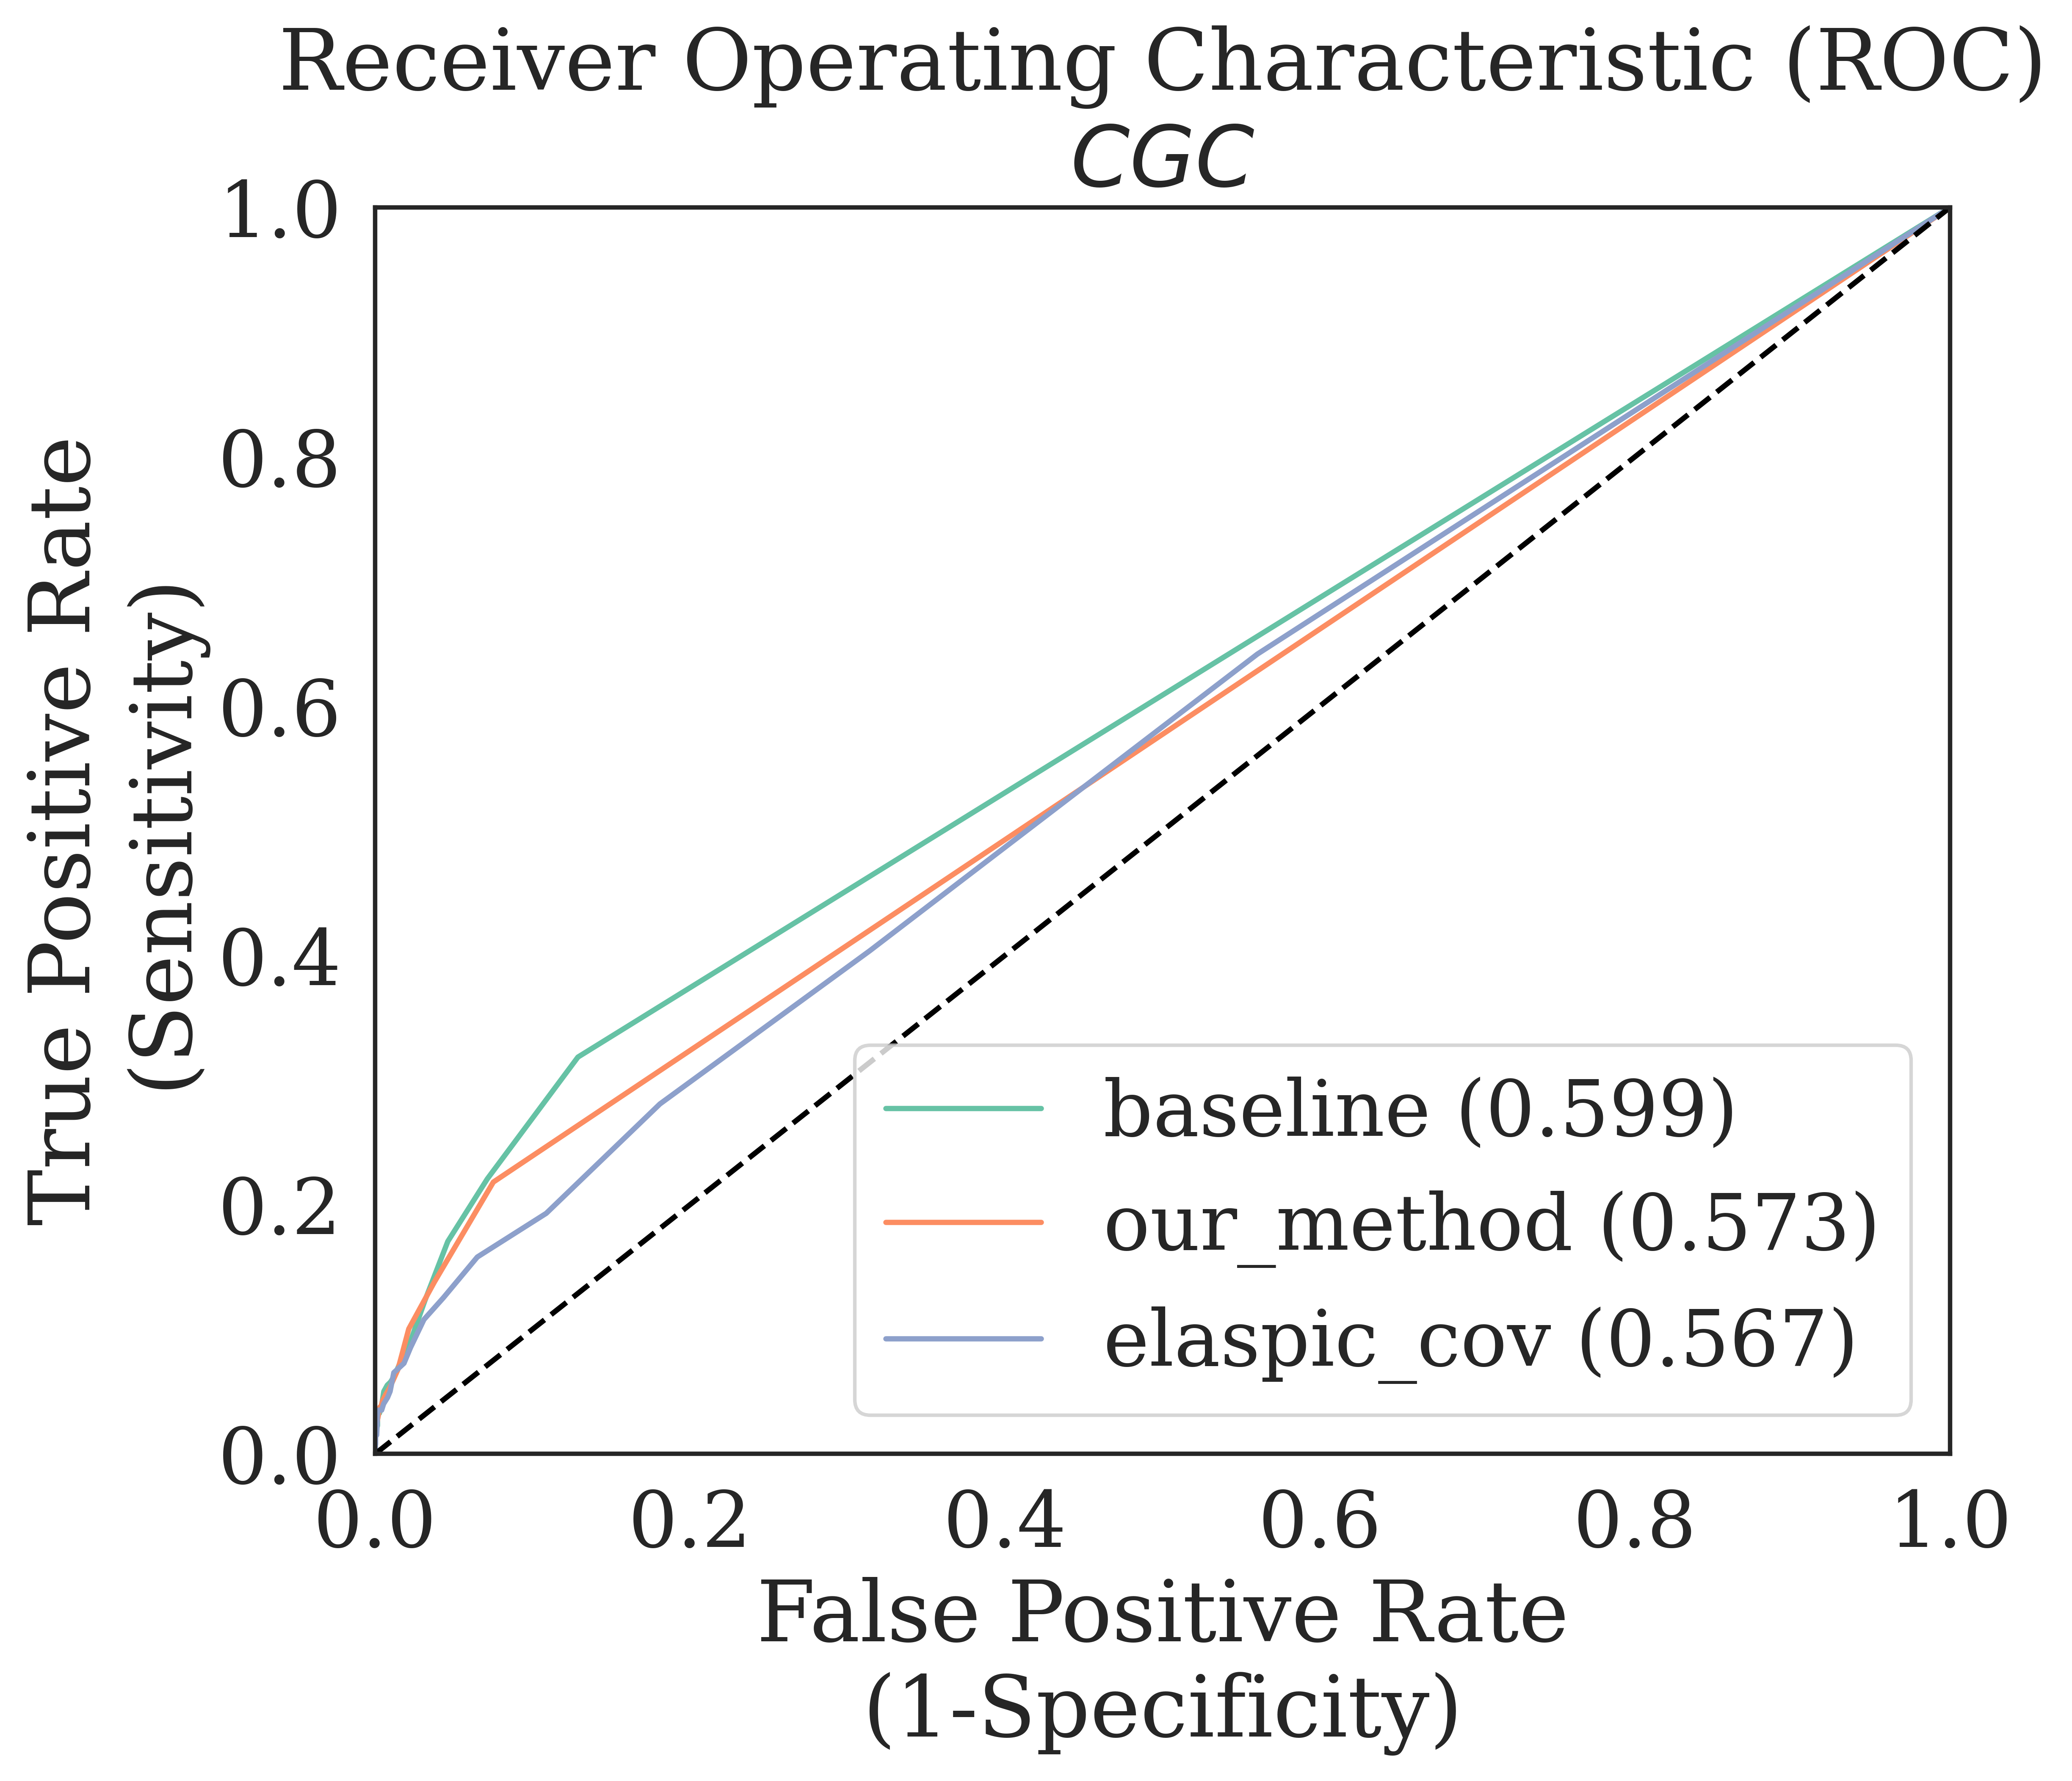

2022-06-17 16:00:02 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.599
2022-06-17 16:00:02 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.573
2022-06-17 16:00:02 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.567


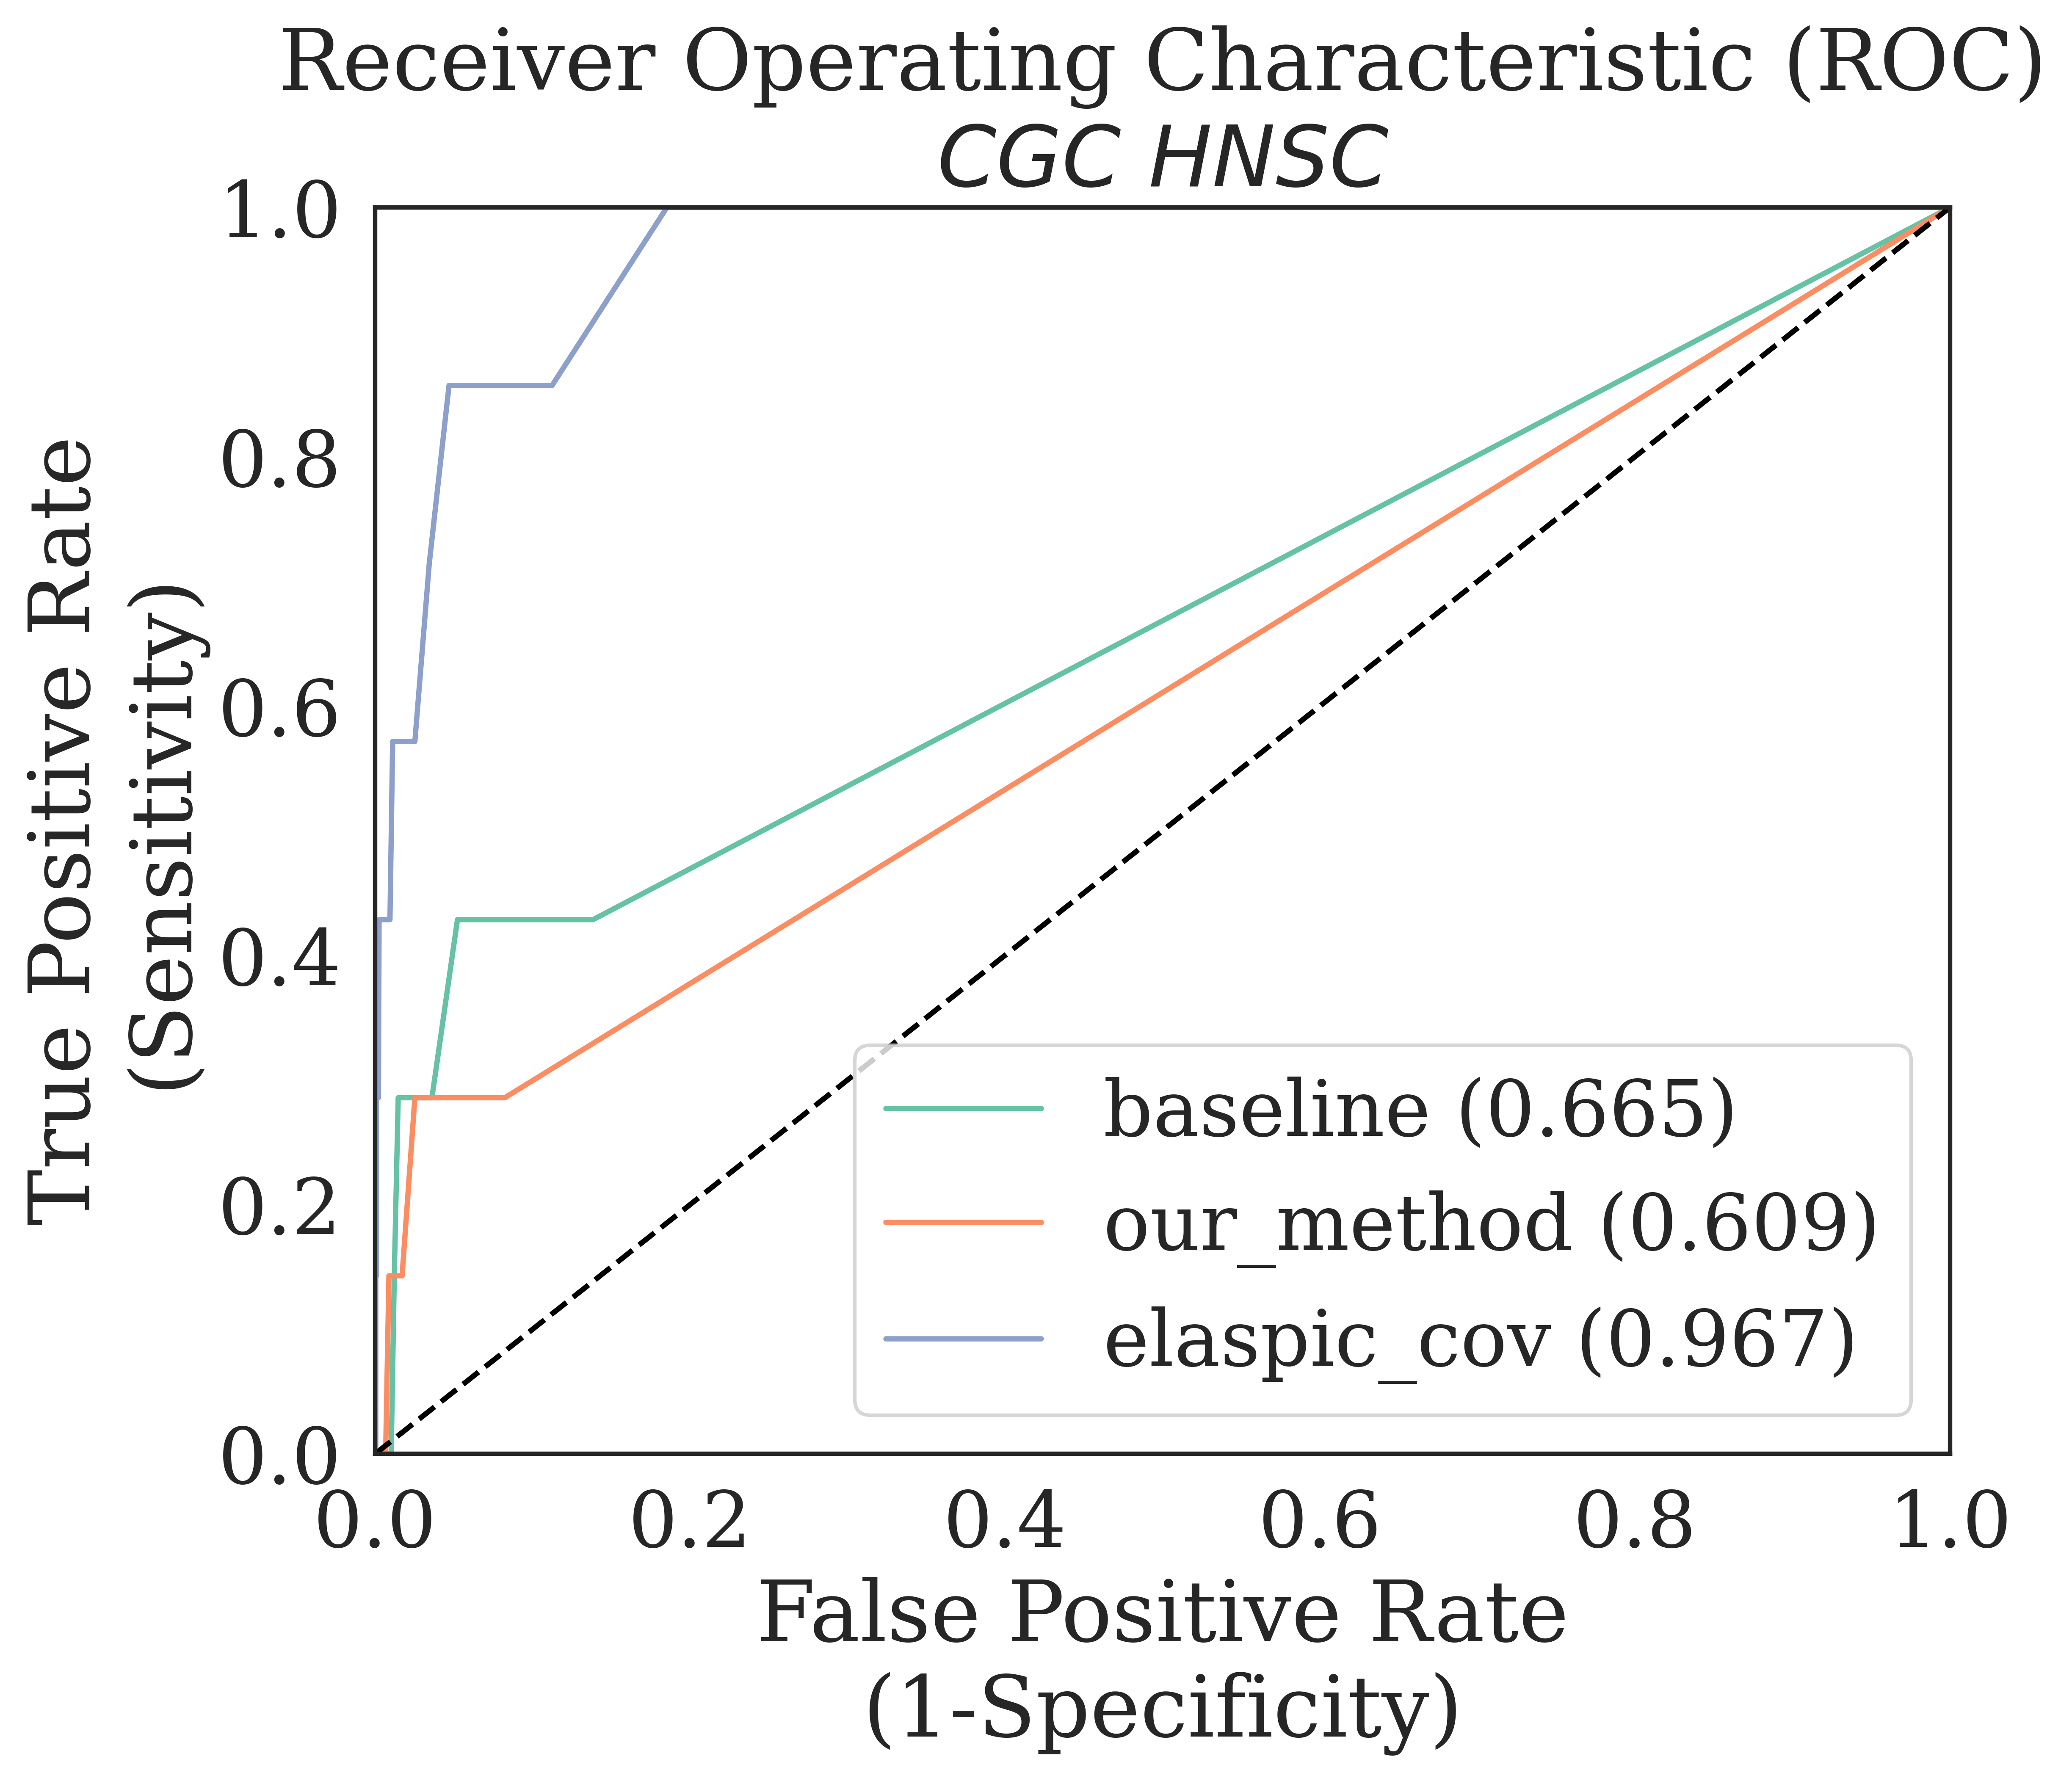

2022-06-17 16:00:05 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.665
2022-06-17 16:00:05 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.609
2022-06-17 16:00:05 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.967


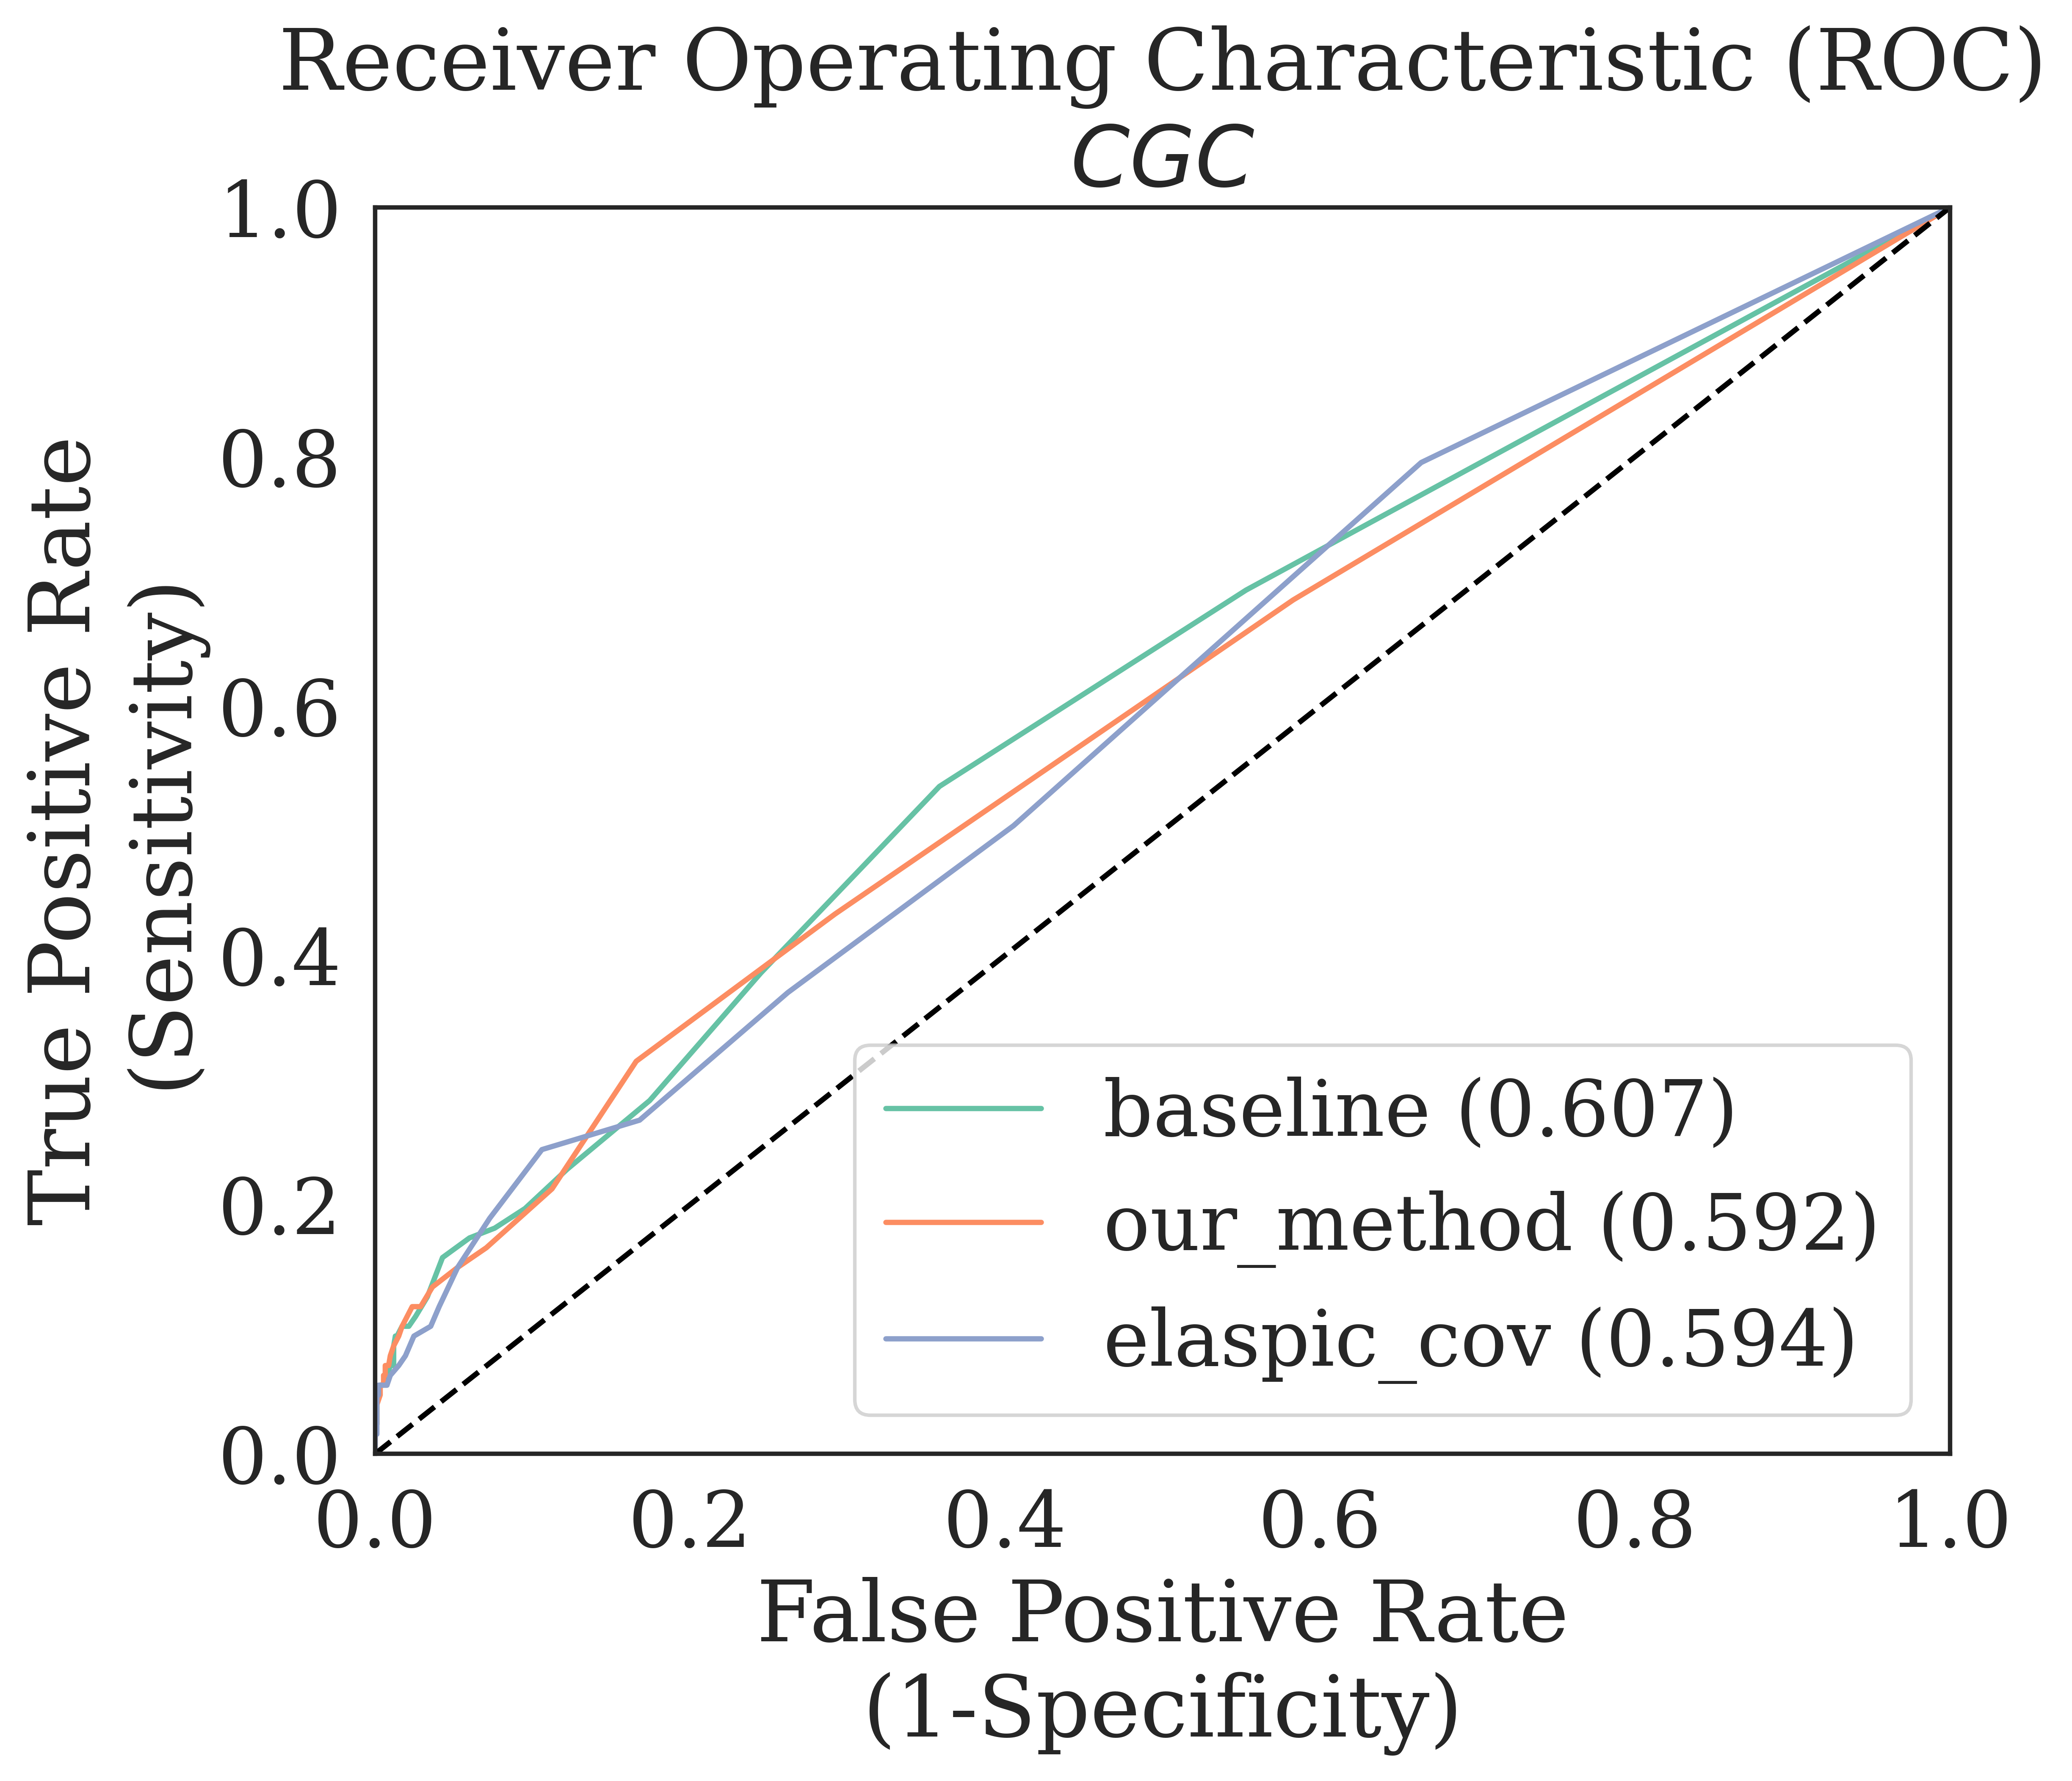

2022-06-17 16:00:08 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.607
2022-06-17 16:00:08 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.592
2022-06-17 16:00:08 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.594


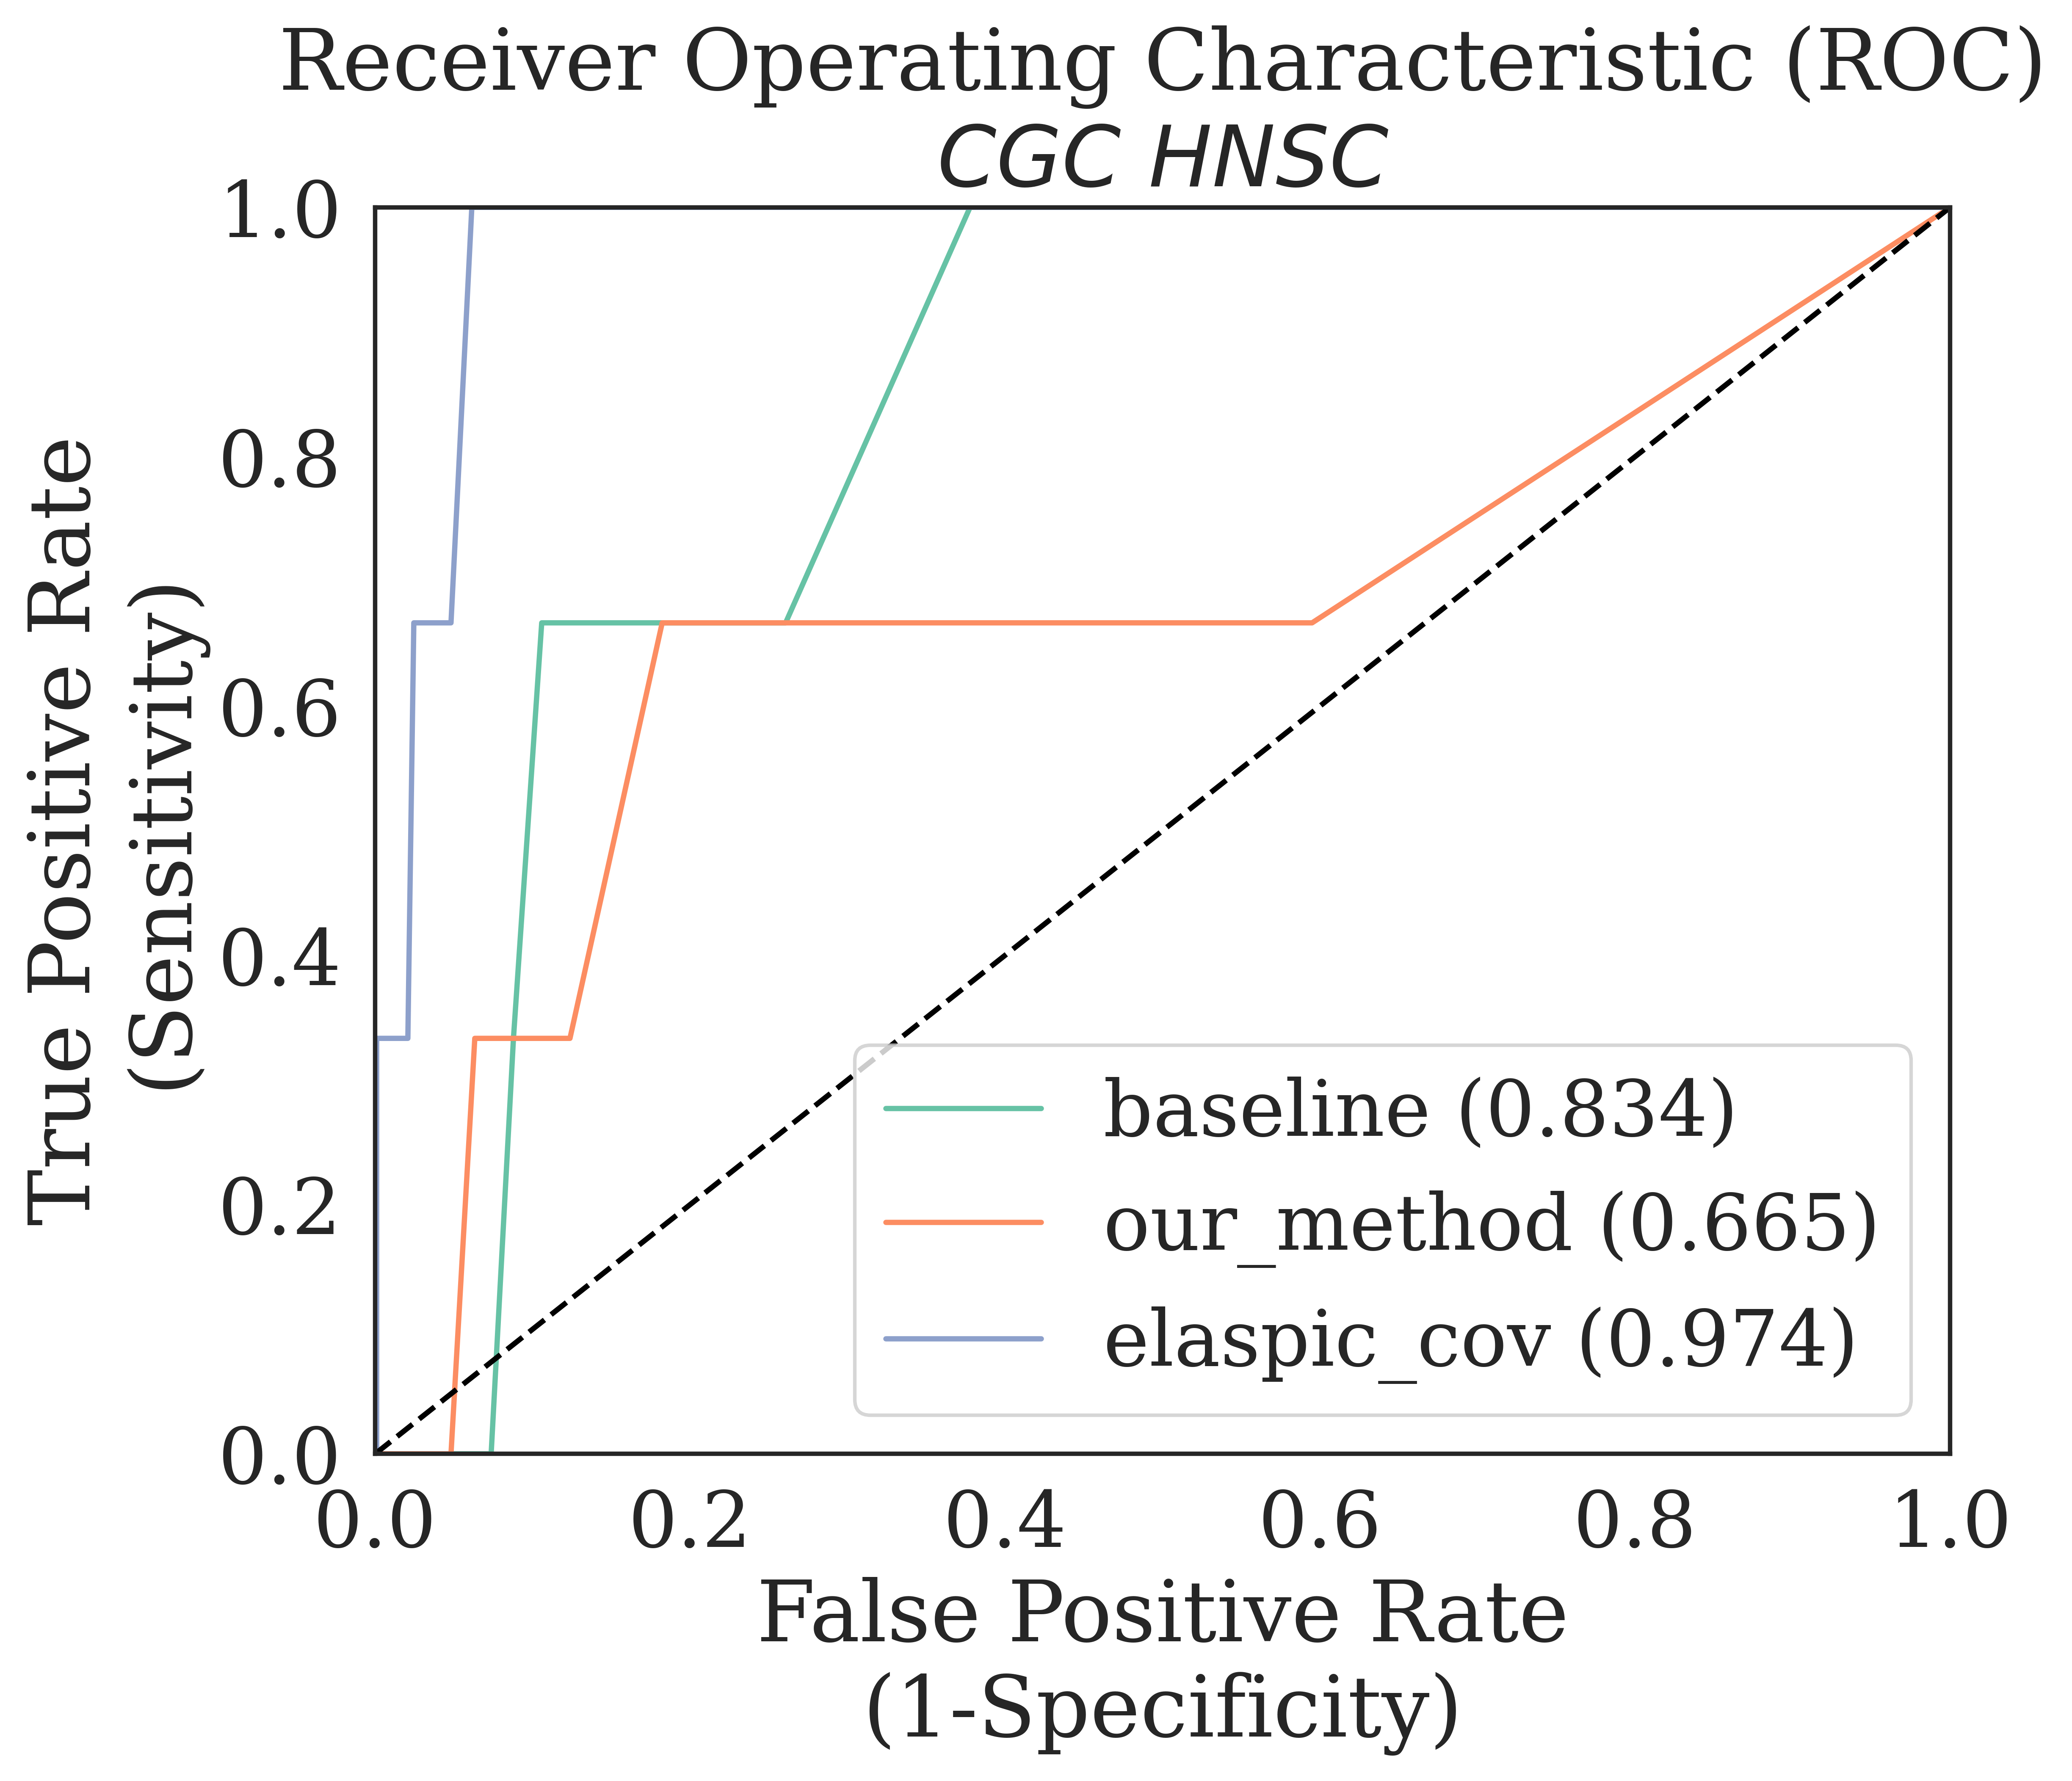

2022-06-17 16:00:12 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.834
2022-06-17 16:00:12 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.665
2022-06-17 16:00:12 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.974


In [25]:
predator_analysis.run_roc_curve_analysis(
    preliminary_data_name="hnsc_preliminary_data",
    state_variables=["CGC_STATUS", "CGC_STATUS (HNSC)"]
)

In [26]:
predator_analysis.export_auc_scores("auc_scores_cgc", overwrite=False)

default default_hnsc baseline_nonzero baseline_nonzero_hnsc
Method                                                                 
BASELINE      0.599        0.665            0.607                 0.834
OURS          0.573        0.609            0.592                 0.665
ELASPIC_COV   0.567        0.967            0.594                 0.974

2022-06-17 16:00:41 | INFO     | helpers.helpers_analysis.common | AUC scores are saved into file ..\data\predictions_datasets\hnsc_prediction_2022-06-17\76f498d9\auc_scores_cgc_2022-06-17.csv


# Save to Excel file

In [27]:
from helpers.helpers_analysis.common import save_to_excel

In [28]:
save_to_excel(
    prediction_file_path=predator_analysis.prediction_data_path,
    preliminary_data=predator_analysis.data_materials["hnsc_preliminary_data"],
    file_name="hnsc_preliminary_data_cgc",
    export_flag=True
)

2022-06-17 16:00:52 | DEBUG    | helpers.helpers_analysis.common | ..\data\predictions_datasets\hnsc_prediction_2022-06-17\76f498d9\hnsc_preliminary_data_cgc_2022-06-17.xlsx is exported.
2022-06-17 16:00:52 | DEBUG    | helpers.helpers_analysis.common | descriptions_..\data\predictions_datasets\hnsc_prediction_2022-06-17\76f498d9\hnsc_preliminary_data_cgc_2022-06-17_descriptions.xlsx is exported.


---

In [29]:
# done